In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats



In [2]:
%matplotlib inline
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()




    

def classif_results(y_test,y_pred): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()
  
  print(classification_report(y_test, y_predict))
  auc = roc_auc_score(y_test, y_predict)
  print("AUC Score: ")
  print(auc)
  fpr, tpr, thresholds = roc_curve(y_test, y_predict)
  plot_roc_curve(fpr, tpr)
    

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/radathan1/Age_income_csv/main/adult.csv',na_values = '?')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Basic information about dataset

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## 1. Checking if the dataset is  balanced/imbalanced.

Percent of persons having income less than 50k : 75.91904425539757%
Percent of persons having income greater than 50k : 24.080955744602438%


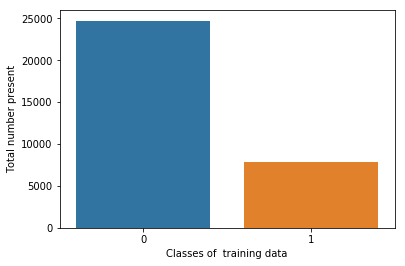

In [8]:
%matplotlib inline
a = 0
b = 0
greater_than_ffity = 0
less_than_fifty = 0
income_disb = df['income']
income_disb =income_disb.replace(['<=50K', '>50K'],[0,1])
sns.countplot(income_disb)
for i in income_disb:
    if i ==0:
        a+=1
    else:
        b+=1
less_than_fifty = a/32561
greater_than_fifty = b/32561
plt.xticks([0,1])
plt.xlabel('Classes of  training data')
plt.ylabel('Total number present')
print('Percent of persons having income less than 50k : {}%'.format(less_than_fifty*100) )
print('Percent of persons having income greater than 50k : {}%'.format(greater_than_fifty*100))
plt.show()

## Observation 
It was found that given data was imbalancely distributed

## 2.Finding Missing values in the dataset

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:


df.dropna(inplace = True)

In [11]:
lin_df = df.copy()

##  Univariate analysis

## Age vs income 

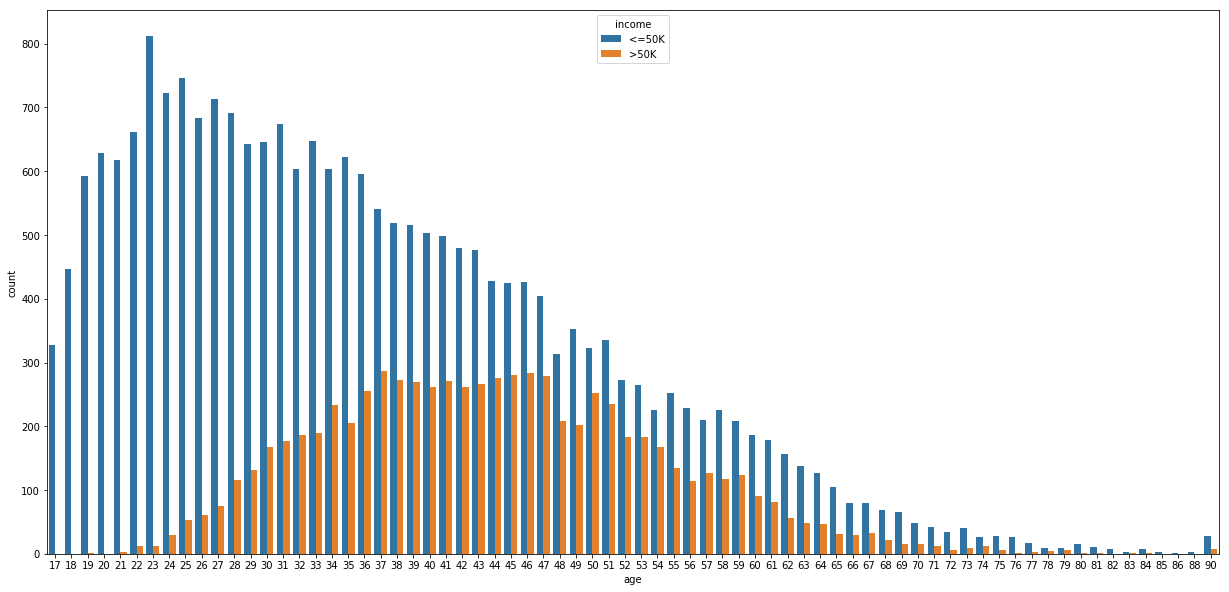

In [12]:
%matplotlib inline
rcParams['figure.figsize'] = 21,10
sns.countplot(df['age'],hue = df['income'])


c:\users\acer\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


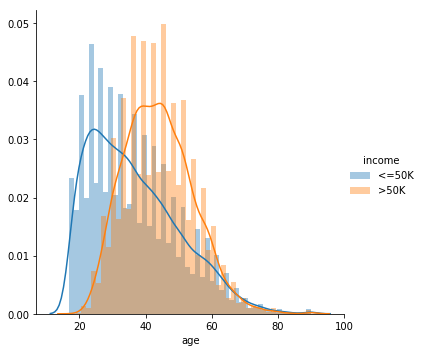

In [13]:
%matplotlib inline
sns.FacetGrid(df,hue = 'income',size = 5).map(sns.distplot,'age').add_legend()



## Observation
1.It was found that the Age group of 37- 48 had the large number of persons having income greater than 50k.While the age group   of 19-38 had income less than or equal to 50k.

2.The data of persons having income less than 50k is right skewed.

## workclass vs income

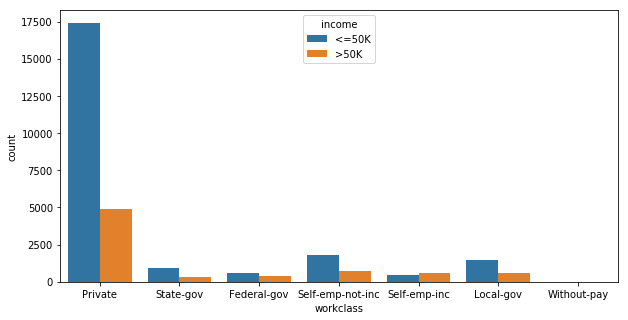

In [14]:
%matplotlib inline
rcParams['figure.figsize'] = 10,5
sns.countplot(df['workclass'],hue = df['income'])

## Observation
The dataset mainly contains private employees.The Private employees had a large number of people who earned less than 50k

## Education level vs income

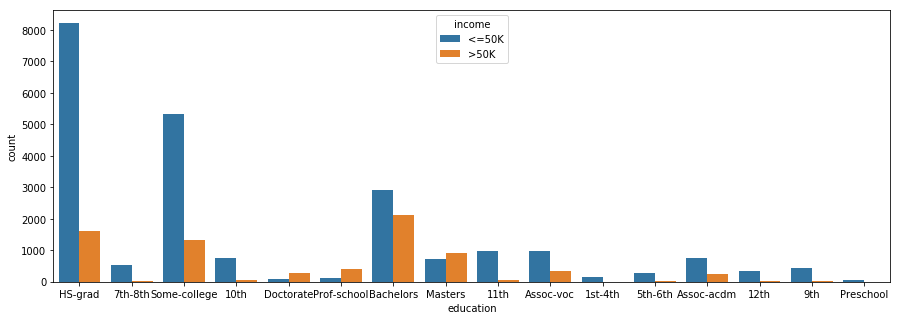

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 15,5
sns.countplot(df['education'],hue = df['income'])

## Observation
1.Among people who earned >=50k,people  having bachelors degree had  largest count.

2.People who had doctrate,Professional-school degree,Masters had majority of them having income >50k.

3.While the people who were high school graduates had the highest count with income less than or equal to 50k

4.People who didnt even have high school degree had very less number of them having income >50k.

##  marital-status vs income

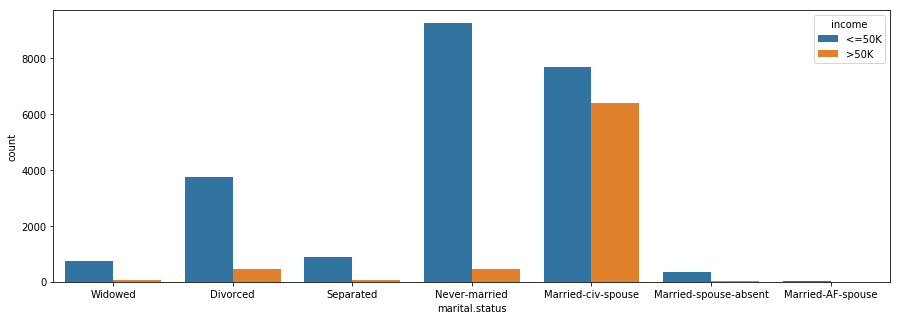

In [16]:
%matplotlib inline
rcParams['figure.figsize'] = 15,5
sns.countplot(df['marital.status'],hue = df['income'])

## Observation
1.People who were never married had the largest count having income <=50k 

2.Among people who had income >50k, those who were married to a civilan spouse had the largest count having income >50k 

## Race vs income 

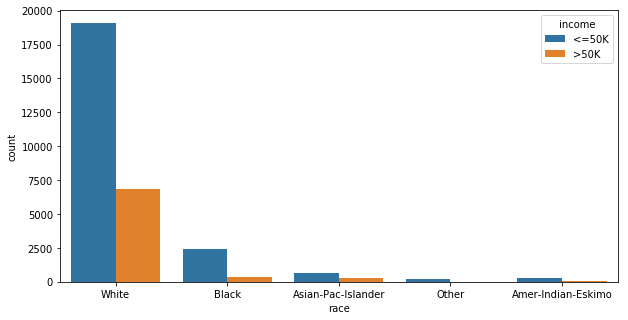

In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 10,5
sns.countplot(df['race'],hue = df['income'])

##  Observation
1.People who belonged to the white race had a large proportion of them having income <50k.

2.Majority of the dataset contains people of white race.

3.Among the people who earned income >50k white people had a large count.


## Sex vs income

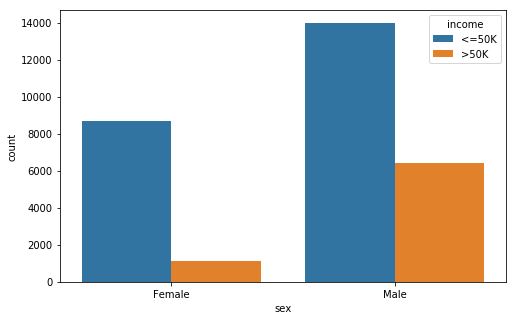

In [18]:
%matplotlib inline
rcParams['figure.figsize'] = 8,5
sns.countplot(df['sex'],hue = df['income'])

##  Observation

1.Males had dominance over females in census dataset.

2.Among people who earned income>50k, Males had the largest count.

3.Among males,most of them were having income <50k.


## Work hours per week vs income 

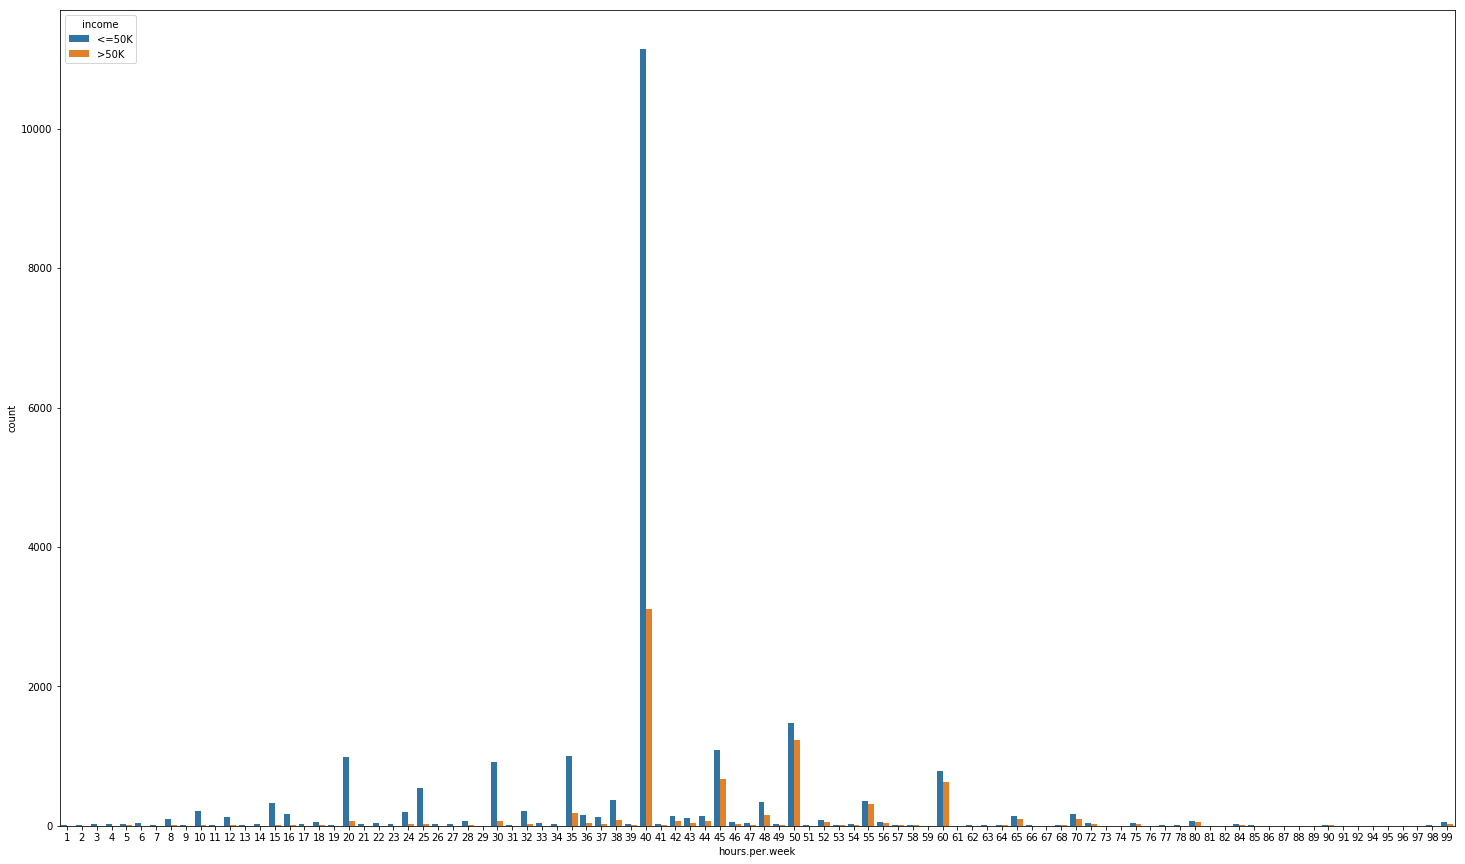

In [19]:
%matplotlib inline
rcParams['figure.figsize'] = 25,15
sns.countplot(df['hours.per.week'],hue = df['income'])


##  Observation
1.Among the people who got <=50k income,people who worked 40 hours per week had shared a large proportion.

 

## Ocupation vs income 

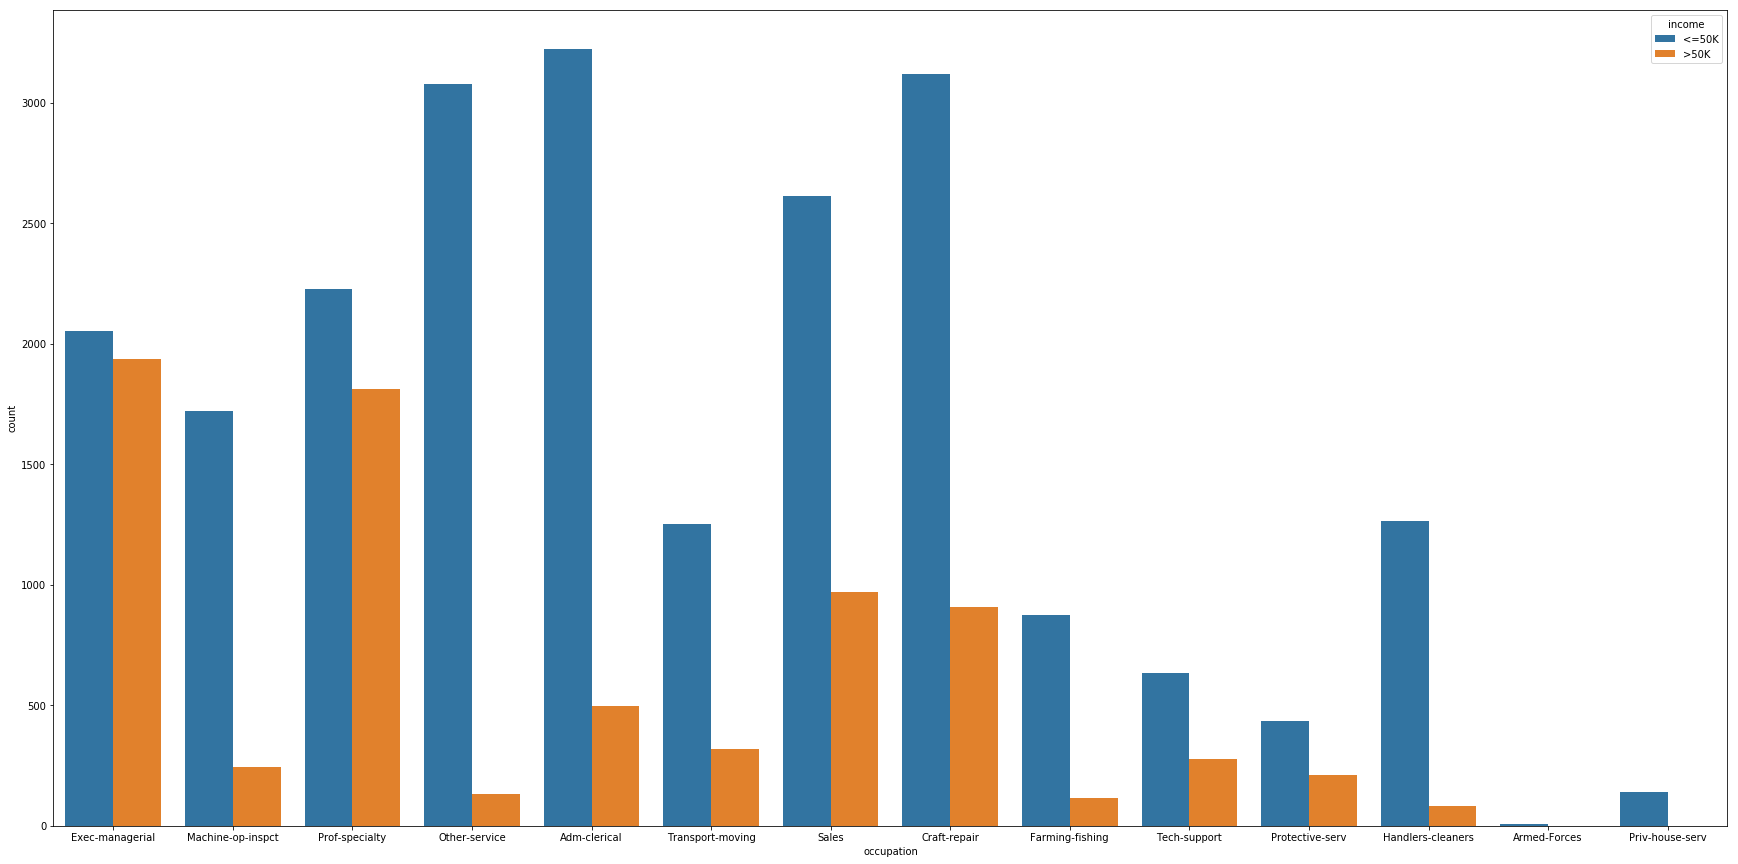

In [20]:
%matplotlib inline
rcParams['figure.figsize'] = 30,15
sns.countplot(df['occupation'],hue = df['income'])


##  Observation
1.Those who were in the executive-managerial and prof-speciality posts recieved income >50k relative to other job posts.

2.While those who were in Admin-clerical posts,craft-repair and Sales had high number of people who recieved income <=50k  

##  Number of years of  education vs income

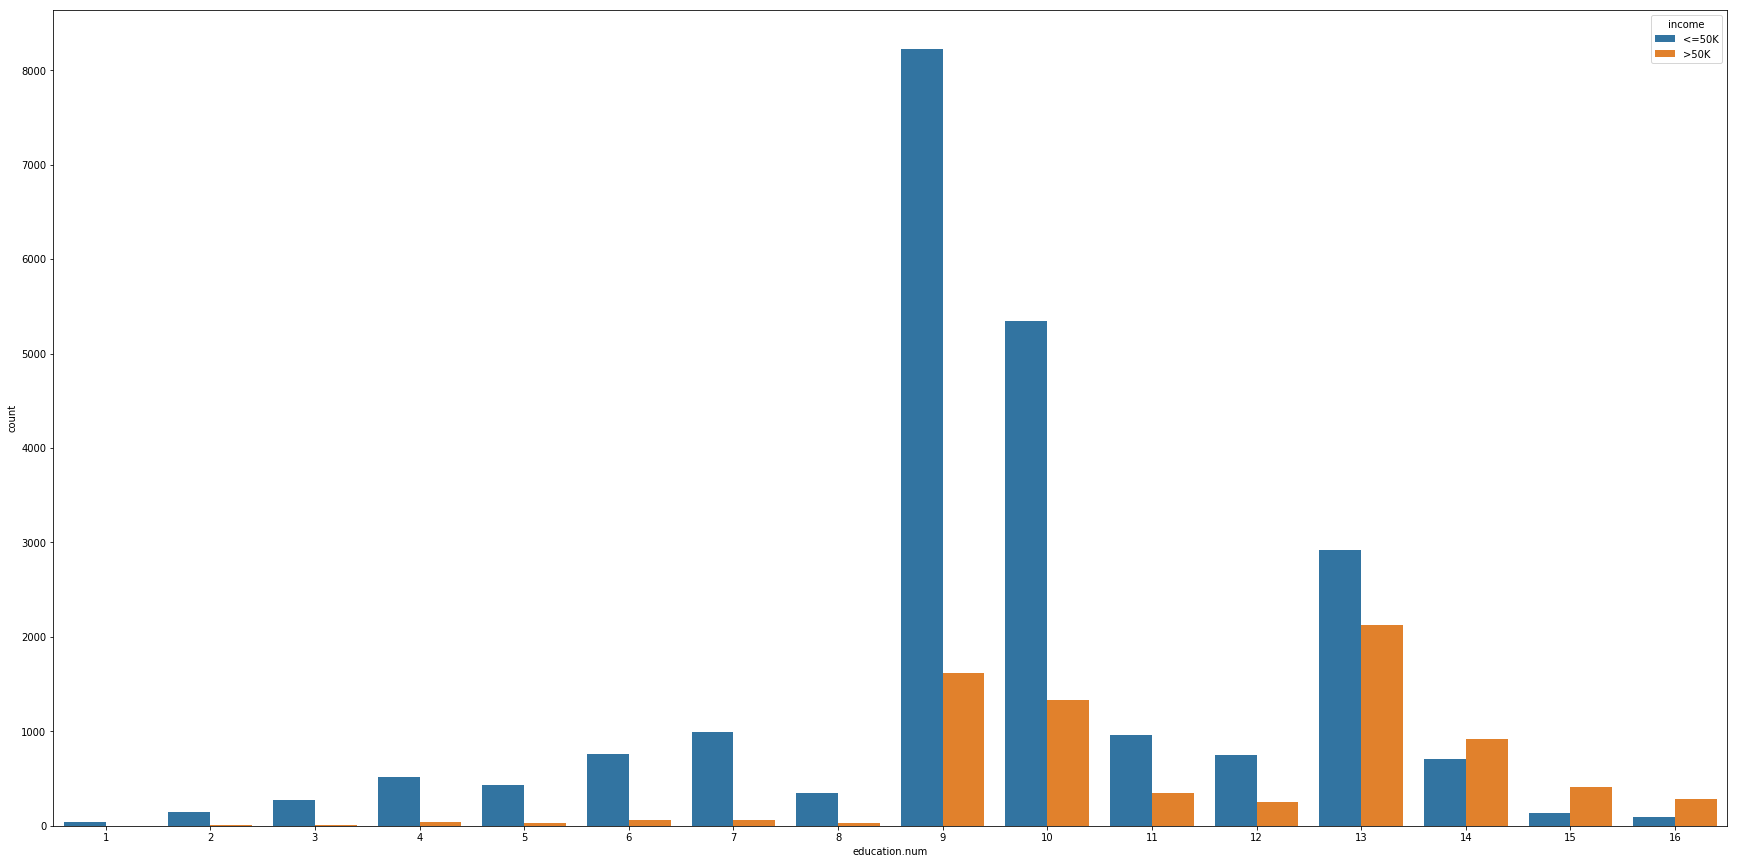

In [21]:
%matplotlib inline
rcParams['figure.figsize'] = 30,15
sns.countplot(df['education.num'],hue = df['income'])


## Observation
1.People with very less education(i.e 1,2,3...8 years) had very small proprtion among them having income >50k.

2.People with higher years of education(14,15,16 years) had a majority of them having income >50k.

## Capital Gain vs income 

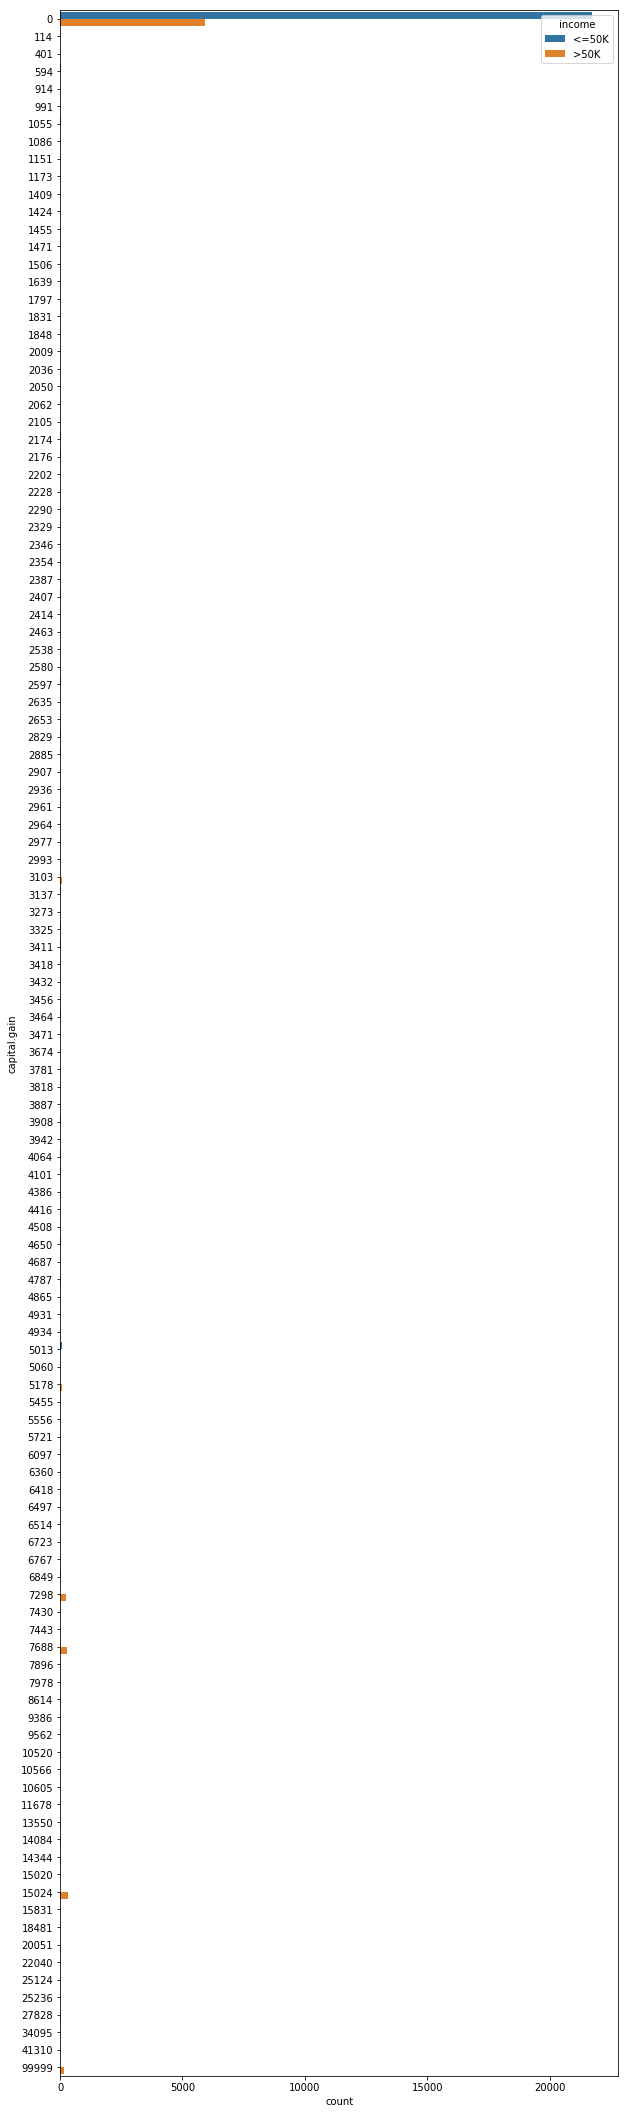

In [22]:
%matplotlib inline
rcParams['figure.figsize'] = 10,38
sns.countplot( y= 'capital.gain',hue = 'income', data =df)

## Observation

1.All most all the people had capital gain 0 


## Capital loss vs income 

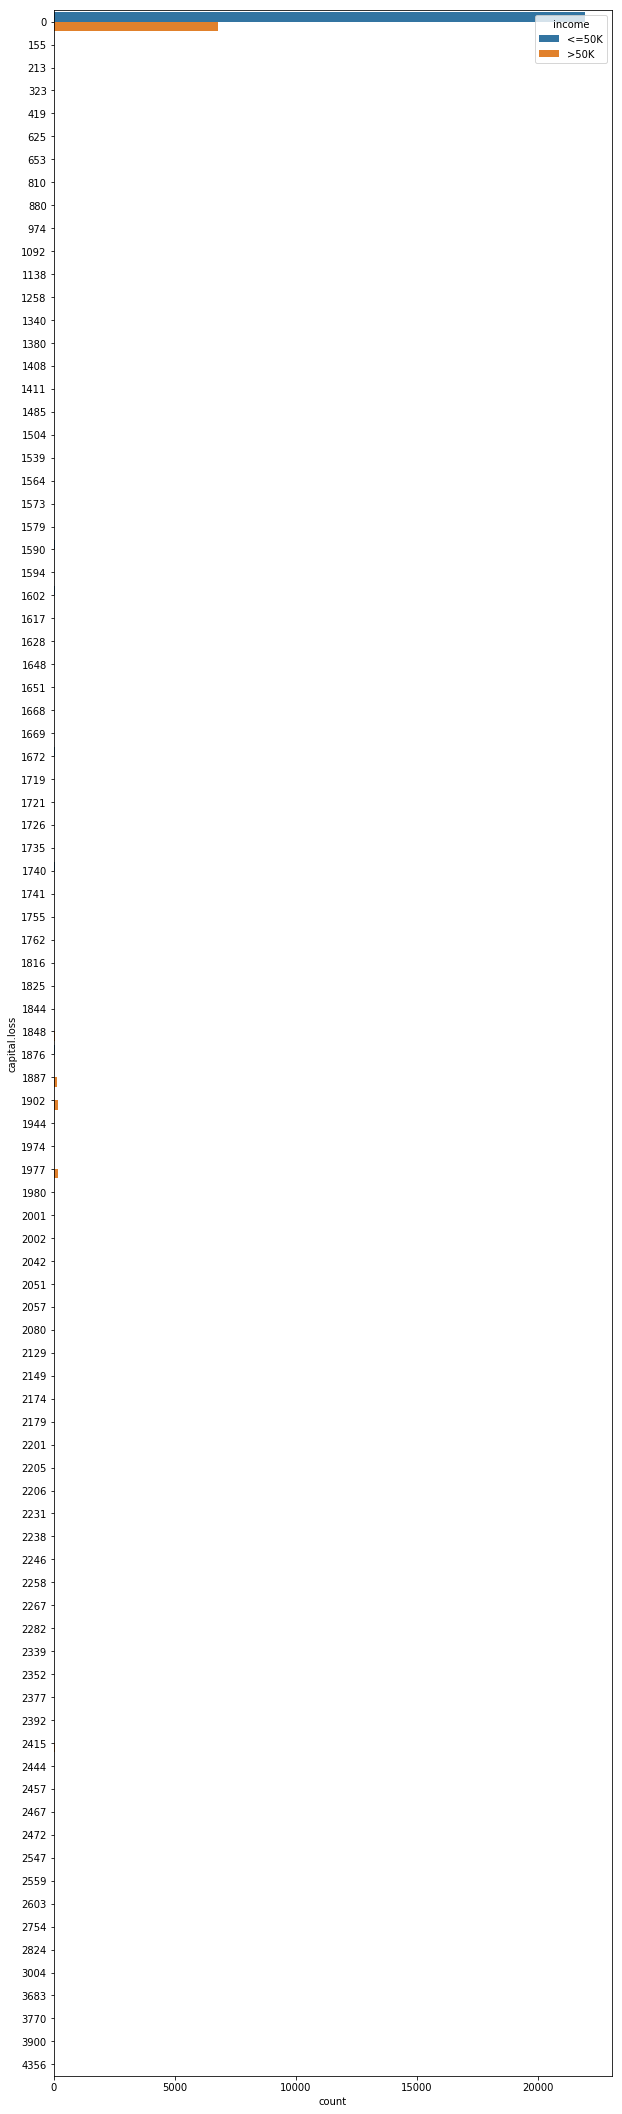

In [23]:
%matplotlib inline
rcParams['figure.figsize'] = 10,38
sns.countplot( y= 'capital.loss',hue = 'income', data =df)

## Observation

1.Most of the people had the capital loss equal to zero

##  relationship vs income

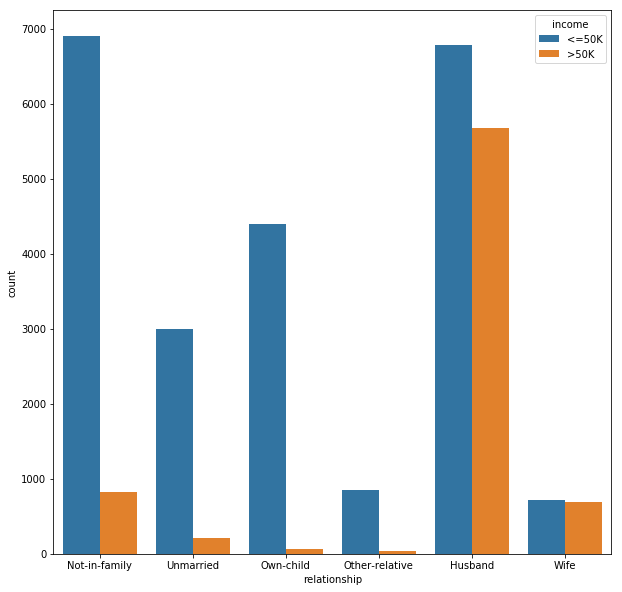

In [24]:
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sns.countplot(df['relationship'],hue = df['income'])

## Observation
1 Persons with relation 'Not-in-family','Unmarried','Own-child','Other-relative' had only very less count of people having income>50k.

2.Persons with relation as 'wife' had equal number of people havin income <=50k and >50k.

## Native Country vs income

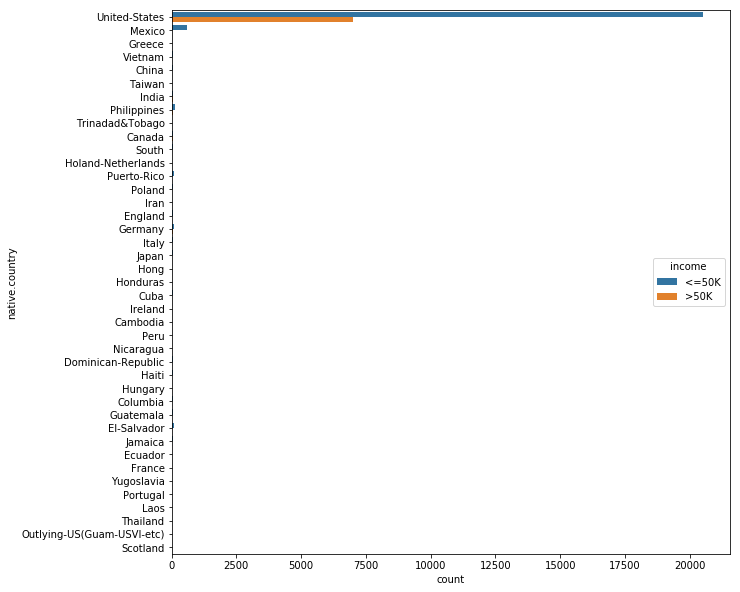

In [25]:
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sns.countplot(y = df['native.country'],hue = df['income'],data = df)

## Observation
1.The main observation is that most of the people who participated in this survey were natives of United-States.

2.Other countries had very less  representation.

## Corelation matrix

In [26]:
df['incomes'] = df['income'].map({'<=50K': 0 ,'>50K':1} )
y = df['incomes']

In [27]:
df_numfeat = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','incomes']
df_catfeat = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

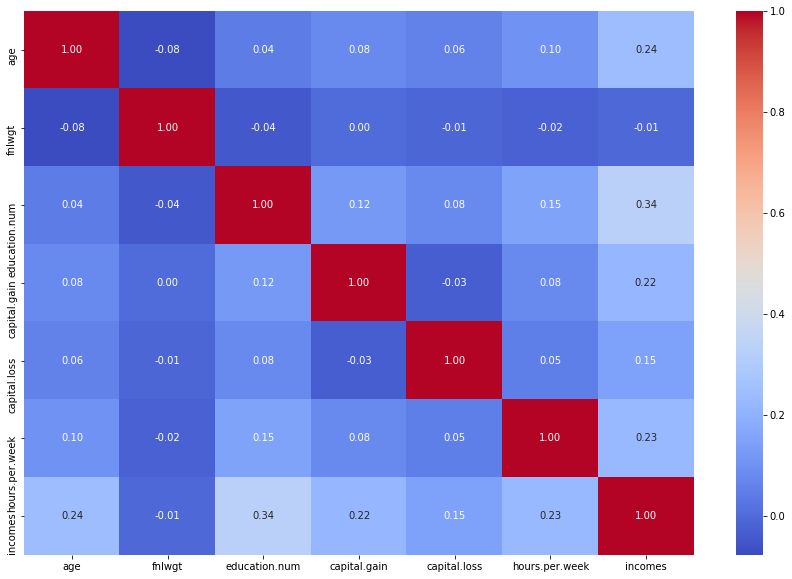

In [28]:
%matplotlib inline
plt.figure(figsize=(15,10))
g = sns.heatmap(df[df_numfeat].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

## Observation
The correlation matrix shows that:

1.Age,education.num,capital.gain,hours.per.week had weak positive corelation with income

4.fnlwgt had almost zero corelation with income.


In [29]:
df1 = df
df1 = pd.DataFrame(data=df,columns=['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country'])

## Treating Outliers

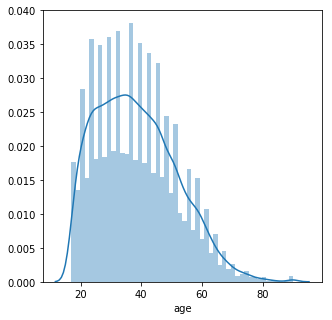

In [30]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.distplot(df['age'],kde =True)
plt.show()

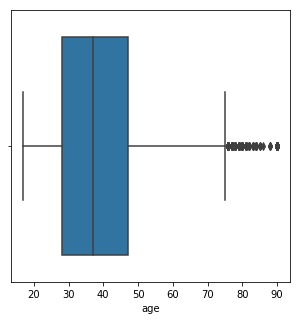

In [31]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.boxplot(df1['age'])
plt.show()


In [32]:
df1['age'] = np.log10(df1['age'])

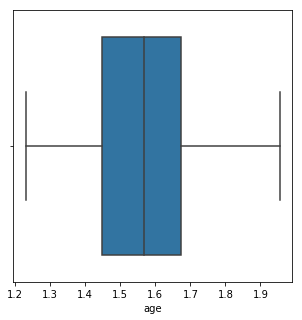

In [33]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.boxplot(df1['age'])
plt.show()